# House Price Prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importing Data and Checking out.

In [2]:
HouseDF = pd.read_csv('data.csv')

In [3]:
HouseDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
HouseDF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
HouseDF.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Exploratory Data Analysis for House Price Prediction

C:\Users\user\AppData\Local\Temp\ipykernel_8180\1168893419.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HouseDF['SalePrice'])
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

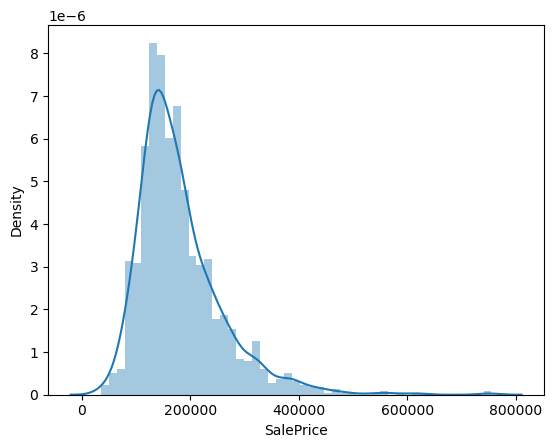

In [7]:
sns.distplot(HouseDF['SalePrice'])

In [8]:
numeric_columns = HouseDF.select_dtypes(include=['number'])
HouseDF_filled = HouseDF.copy()
HouseDF_filled[numeric_columns.columns] = HouseDF_filled[numeric_columns.columns].fillna(numeric_columns.mean())

<Axes: xlabel='SalePrice', ylabel='SalePrice'>

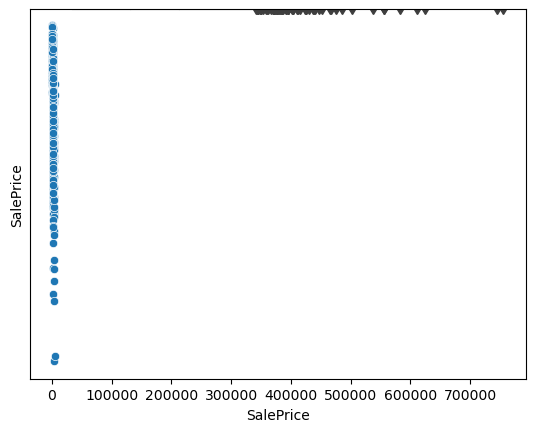

In [9]:
sns.boxplot(x=HouseDF['SalePrice'])
sns.scatterplot(x=HouseDF['GrLivArea'], y=HouseDF['SalePrice'])


<Axes: xlabel='GrLivArea'>

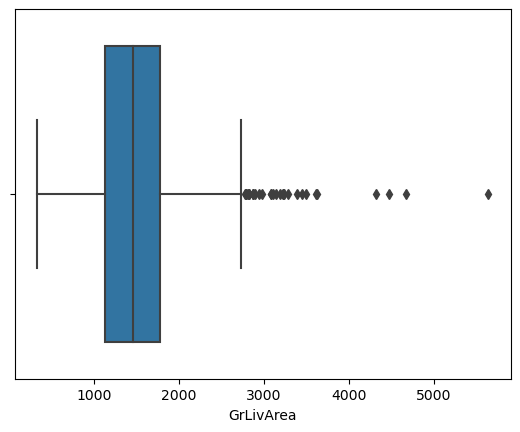

In [10]:
sns.boxplot(x=HouseDF['GrLivArea'])


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

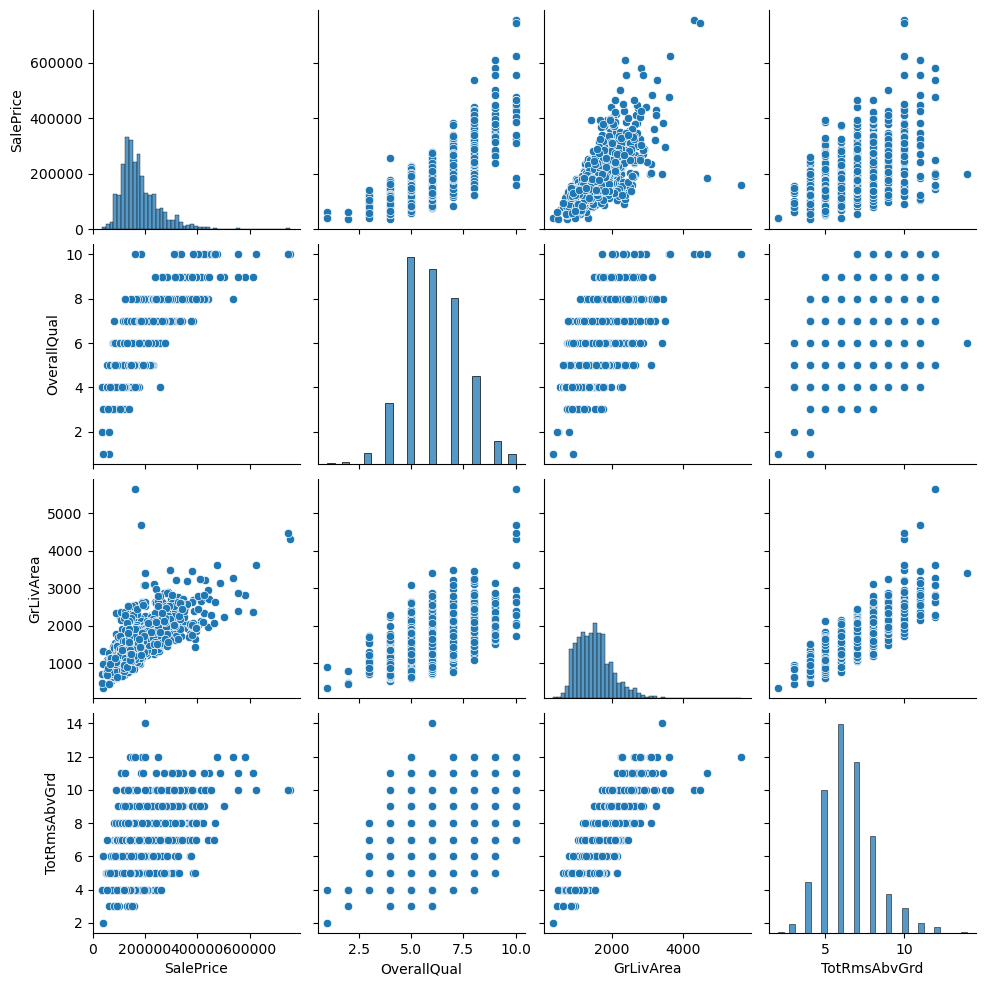

In [11]:
sns.pairplot(HouseDF[['SalePrice', 'OverallQual', 'GrLivArea', 'TotRmsAbvGrd']])


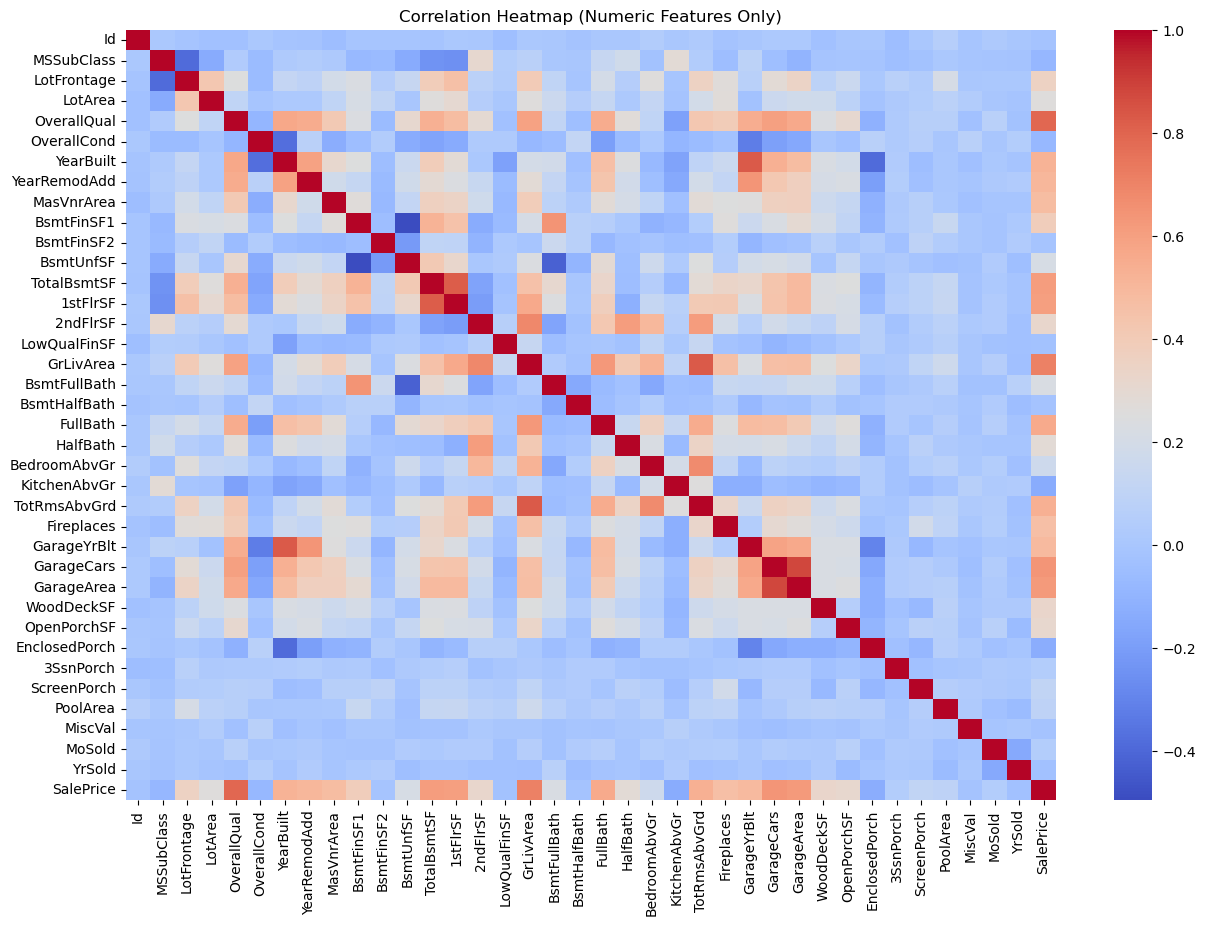

In [12]:
# Select only numeric columns
numeric_data = HouseDF.select_dtypes(include=['number'])

# Generate a correlation heatmap for numeric data only
plt.figure(figsize=(15, 10))
corr_matrix_numeric = numeric_data.corr()
sns.heatmap(corr_matrix_numeric, cmap="coolwarm", annot=False, fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

## Training a Linear Regression Model

### X and y List

In [13]:
X = HouseDF[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
            'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
            'YearBuilt', 'YearRemodAdd']]

y = HouseDF['SalePrice']

### Split Data into Train, Test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Creating and Training the LinearRegression Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

## LinearRegression Model Evaluation

In [20]:
print(lm.intercept_)

-1302150.2778914906


In [21]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
OverallQual,18748.932174
GrLivArea,53.590036
GarageCars,3472.610894
GarageArea,37.218098
TotalBsmtSF,26.364910
1stFlrSF,14.471660
FullBath,-9593.288130
TotRmsAbvGrd,685.991251
YearBuilt,313.997310
YearRemodAdd,307.611819


## Predictions from our Linear Regression Model

In [22]:
predictions = lm.predict(X_test)

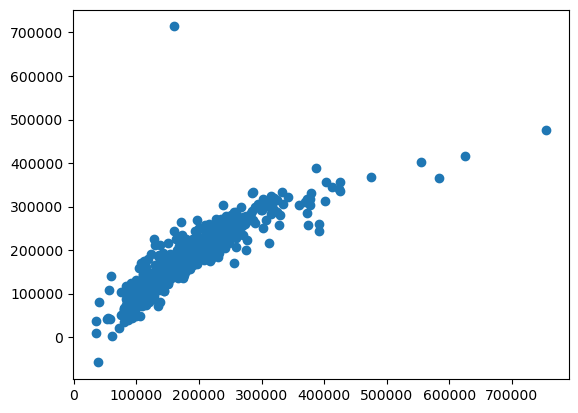

In [23]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

C:\Users\user\AppData\Local\Temp\ipykernel_8180\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


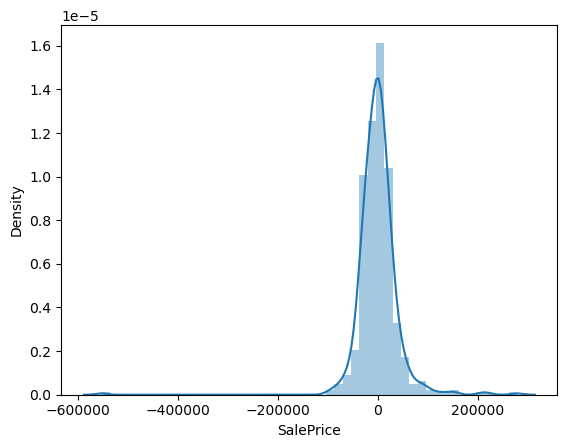

In [24]:
sns.distplot((y_test-predictions),bins=50);

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

## Regression Evaluation Metrics

In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24049.974961257725
MSE: 1744341690.4199758
RMSE: 41765.31683610189


# Random forrest

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)


In [28]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lm, X, y, scoring='neg_mean_squared_error', cv=5)
print(f"Cross-validated MSE: {-cv_scores.mean()}")


Cross-validated MSE: 1529888214.227409


In [29]:
from sklearn.metrics import r2_score
print(f'R²: {r2_score(y_test, predictions)}')


R²: 0.724477929548922


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


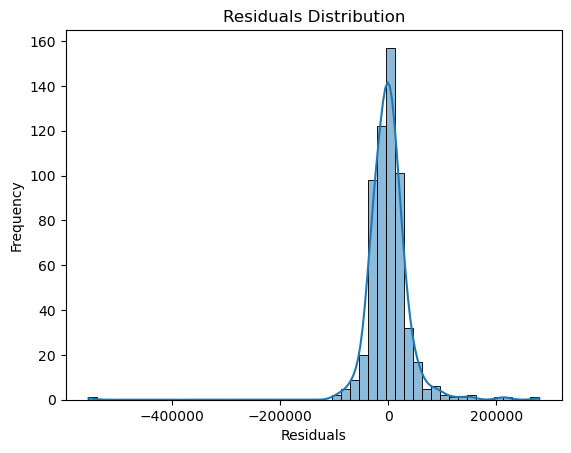

In [30]:
sns.histplot((y_test - predictions), bins=50, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Gradient boosting

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
gb.fit(X_train, y_train)

# Make predictions
gb_predictions = gb.predict(X_test)

# Evaluate performance
print('MAE:', metrics.mean_absolute_error(y_test, gb_predictions))
print('MSE:', metrics.mean_squared_error(y_test, gb_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gb_predictions)))


MAE: 19254.58684829375
MSE: 786493380.5267917
RMSE: 28044.489307648157


# Suggestion for buying a new house 

In [34]:
def recommend_house(min_price, max_price, min_area):
    return HouseDF[(HouseDF['SalePrice'] >= min_price) & 
                   (HouseDF['SalePrice'] <= max_price) & 
                   (HouseDF['GrLivArea'] >= min_area)]


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Select the features you want to cluster
features = HouseDF[['SalePrice', 'GrLivArea']]

# Standardize the features (scaling the data)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=5)
HouseDF['Cluster'] = agg_clust.fit_predict(scaled_features)

# Display the clustered data
print(HouseDF[['SalePrice', 'GrLivArea', 'Cluster']].head())


   SalePrice  GrLivArea  Cluster
0     208500       1710        3
1     181500       1262        0
2     223500       1786        3
3     140000       1717        0
4     250000       2198        3


#### Larger  the GrLivArea  higher the house prices as evident from the clustering patterns

### Model Comparison Report:

Objective:
Predict house prices using machine learning models.

Models Used:

Linear Regression: Baseline model.
Random Forest: Handles non-linearity and large datasets.
Gradient Boosting: More accurate due to boosting.
Best Model:
Gradient Boosting outperforms others, followed by Random Forest. Linear Regression is a good baseline.

Recommendation:
Use Gradient Boosting for production.


### The report outlines the challenges and solutions during data preprocessing and modeling:

Data Quality Challenges:

Missing Data: Imputed missing values or dropped non-critical features.
Skewed Features: Applied log transformation to normalize SalePrice.
Outliers: Used IQR to handle outliers in features like GrLivArea.
Categorical Variables: Encoded using one-hot encoding.
Feature Scaling: Standardized features using StandardScaler.
Modeling Challenges:

Overfitting: Mitigated with cross-validation and hyperparameter tuning.
Non-Linear Relationships: Used Random Forest and Gradient Boosting.
Model Interpretability: Used feature importance to improve understanding.
In conclusion, the report addresses data quality issues and overfitting, ensuring robust model training.